In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt #Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

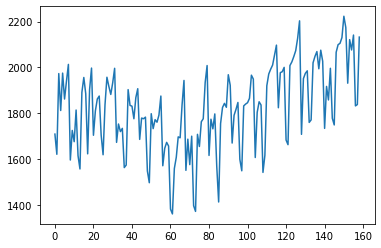

In [3]:
Walmart=pd.read_csv('footfalls.csv')
Walmart.Footfalls.plot()

#Splitting data

In [4]:
Train=Walmart.head(147)
Test=Walmart.tail(12)

##Moving Average

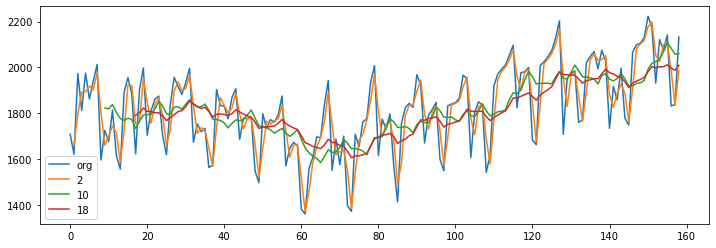

In [7]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label='org')
for i in range(2,24,8):
    Walmart['Footfalls'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

# Time series decomposition plot

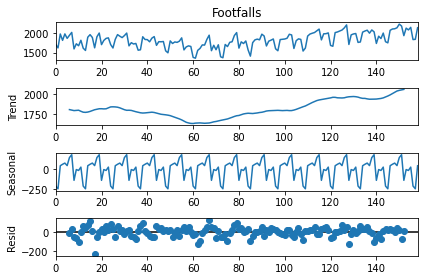

In [8]:
decompose_ts_add=seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

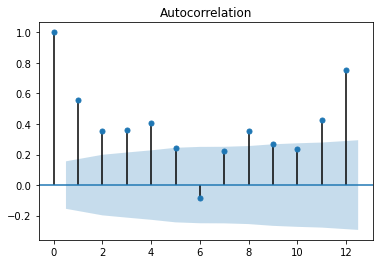

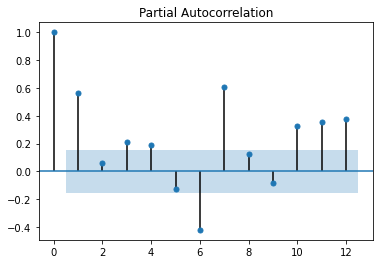

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls, lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()

# Evaluation Metric MAPE

In [10]:
def MAPE(pred,org):
    temp= np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [11]:
ses_model=SimpleExpSmoothing(Train['Footfalls']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start =Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Footfalls)

8.490637057828362

# Holt method

In [12]:
hw_model=Holt(Train['Footfalls']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hw,Test.Footfalls)

7.546249229496066

Holts winter exponential smoothing with additive seasonality and additive trend

In [13]:
hwe_model_add_add=ExponentialSmoothing(Train['Footfalls'],seasonal='add',trend='add',seasonal_periods=12).fit()#add the trend to the model
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


3.1889087280534336

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [14]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

3.1198352466005623

Final Model by combining train and test

In [15]:
hwe_model_add_add=ExponentialSmoothing(Walmart['Footfalls'],seasonal='add',trend='add',seasonal_periods=12).fit()

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [16]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2138.992484
160    2167.267696
161    2129.403200
162    2231.514658
163    2269.221402
164    1944.228150
165    2087.989369
166    2075.293707
167    2120.809207
168    1878.056653
dtype: float64